# Project 1: Simple Linear Regression

## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 1: Define function_1 to estimate parameters for simple linear regression (‘intercept’ & ‘slope’)

In [2]:
# intercept, slope = function_1(input_feature, output)

def function_1(input_feature, output):
    
    # Adding a column of 1s to input_feature 
    input_feature = np.c_[np.ones(input_feature.shape[0]),input_feature]
    
    # Computing intercept & slope using closed form solution
    N =  input_feature.shape[0]
    sx = np.sum(input_feature[:,1])
    sxx = np.dot(input_feature[:,1],input_feature[:,1])
    sy = np.sum(output)
    sxy = np.dot(input_feature[:,1],output)

    slope = (sxy - sx*sy/N) / (sxx - sx * sx/N)
    intercept = (sy  - slope * sx)/ N
    
    return intercept, slope

## Step 2: Define function_2 to predict the model output using the simple linear regression parameters

In [3]:
# predicted_output = function_2(input_feature, intercept, slope)

def function_2(input_feature, intercept, slope):
    
    # Adding a column of 1s to input_feature 
    input_feature = np.c_[np.ones(input_feature.shape[0]),input_feature]
    
    # Computing predicted_output
    predicted_output = np.dot(input_feature,np.array([intercept, slope]))
    
    return predicted_output

## Step 3: Define function_3 to calculate the RSS

In [4]:
# RSS = function_3(input_feature, output, intercept, slope):

def function_3(input_feature, output, intercept, slope):
    
    # Adding a column of 1s to input_feature 
    input_feature = np.c_[np.ones(input_feature.shape[0]),input_feature]
    
    # Computing predicted_output
    predicted_output = np.dot(input_feature,np.array([intercept, slope]))
    
    # Computing error and RSS
    error = predicted_output - output
    RSS = np.dot(error,error)
    
    return RSS

## Step 4: Import fish data from Fish.csv

In [5]:
# Importing fish data from Fish.csv
df = pd.read_csv (r'../data/Fish.csv')   
print(list(df.columns))

# Converting Panda data to Numpy data
data = df.to_numpy()

# Shuffle data
#np.random.shuffle(data)

# Spliting train and test data
N = data.shape[0]
train_idx = np.arange(int(0.8*N))
test_idx = np.arange(int(0.8*N),N)

train_data = data[train_idx,:]
test_data = data[test_idx,:]

# Svaing input features and output weigth separately
train_Weight = train_data[:,1].astype(np.float32)
test_Weight = test_data[:,1].astype(np.float32)

train_Length1 = train_data[:,2].astype(np.float32)
test_Length1 = test_data[:,2].astype(np.float32)

train_Length2 = train_data[:,3].astype(np.float32)
test_Length2 = test_data[:,3].astype(np.float32)

train_Length3 = train_data[:,4].astype(np.float32)
test_Length3 = test_data[:,4].astype(np.float32)

train_Height = train_data[:,5].astype(np.float32)
test_Height = test_data[:,5].astype(np.float32)

train_Width = train_data[:,6].astype(np.float32)
test_Width = test_data[:,6].astype(np.float32)

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


## Step 5: Use function_1 to estimate model parameters (‘intercept’ & ‘slope’)

In [6]:
# Step 5 Part a : Model 1
intercept_1, slope_1 = function_1(train_Length1, train_Weight)
print(f"Model 1 based on Fish Vertical Length as input data: \n intercept_1 = {intercept_1}, slope_1 = {slope_1}")

Model 1 based on Fish Vertical Length as input data: 
 intercept_1 = -282.715123340072, slope_1 = 23.356642991286968


In [7]:
# Step 5 Part b : Model 2
intercept_2, slope_2 = function_1(train_Length2, train_Weight)
print(f"Model 2 based on Fish Diagonal Length as input data: \n intercept_2 = {intercept_2}, slope_2 = {slope_2}")

Model 2 based on Fish Diagonal Length as input data: 
 intercept_2 = -290.6516623549403, slope_2 = 21.87307481529085


In [8]:
# Step 5 Part c : Model 3
intercept_3, slope_3 = function_1(train_Length3, train_Weight)
print(f"Model 3 based on Fish Cross Length as input data: \n intercept_3 = {intercept_3}, slope_3 = {slope_3}")

Model 3 based on Fish Cross Length as input data: 
 intercept_3 = -301.9156528204574, slope_3 = 20.227449727789725


In [9]:
# Step 5 Part d : Model 4
intercept_4, slope_4 = function_1(train_Height, train_Weight)
print(f"Model 4 based on Fish Height as input data: \n intercept_4 = {intercept_4}, slope_4 = {slope_4}")

Model 4 based on Fish Height as input data: 
 intercept_4 = -106.04682653926743, slope_4 = 45.628016350295894


In [10]:
# Step 5 Part e : Model 5
intercept_5, slope_5 = function_1(train_Width, train_Weight)
print(f"Model 5 based on Fish Width as input data: \n intercept_5 = {intercept_5}, slope_5 = {slope_5}")

Model 5 based on Fish Width as input data: 
 intercept_5 = -276.6923500070668, slope_5 = 138.6343719933919


## Step 6: Use function_2 to predict model output

### Step 6 Part a

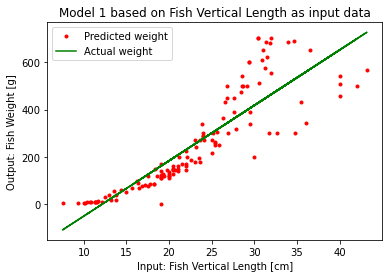

In [11]:
# Computing predicted_weight1 using model 1
predicted_weight1 = function_2(train_Length1, intercept_1, slope_1)

# ploting the data and the fitted model.
plt.plot(train_Length1, train_Weight,'r.', label='Predicted weight')
plt.plot(train_Length1,  predicted_weight1,'g-', label='Actual weight')

plt.title('Model 1 based on Fish Vertical Length as input data')
plt.xlabel('Input: Fish Vertical Length [cm]')
plt.ylabel('Output: Fish Weight [g]')
plt.legend()
plt.savefig('../results/Model_1.png',dpi=600)
plt.show()

### Step 6 Part b

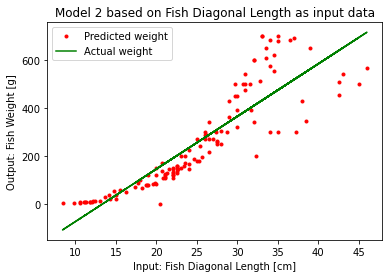

In [12]:
# Computing predicted_weight2 using model 2
predicted_weight2 = function_2(train_Length2, intercept_2, slope_2)

#plot the data and the fitted model.
plt.plot(train_Length2, train_Weight,'r.', label='Predicted weight')
plt.plot(train_Length2,  predicted_weight2,'g-', label='Actual weight')

plt.title('Model 2 based on Fish Diagonal Length as input data')
plt.xlabel('Input: Fish Diagonal Length [cm]')
plt.ylabel('Output: Fish Weight [g]')
plt.legend()
plt.savefig('../results/Model_2.png')
plt.show()

### Step 6 Part c

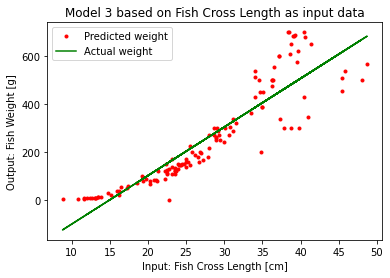

In [13]:
# Computing predicted_weight3 using model 3
predicted_weight3 = function_2(train_Length3, intercept_3, slope_3)

#plot the data and the fitted model.
plt.plot(train_Length3, train_Weight,'r.', label='Predicted weight')
plt.plot(train_Length3,  predicted_weight3,'g-', label='Actual weight')

plt.title('Model 3 based on Fish Cross Length as input data')
plt.xlabel('Input: Fish Cross Length [cm]')
plt.ylabel('Output: Fish Weight [g]')
plt.legend()
plt.savefig('../results/Model_3.png',dpi=600)
plt.show()

### Step 6 Part d

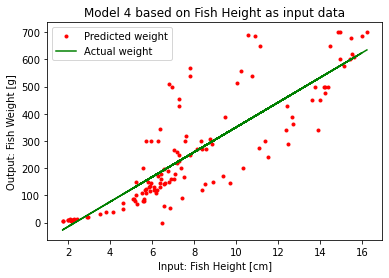

In [14]:
# Computing predicted_weight1 using model 4
predicted_weight4 = function_2(train_Height, intercept_4, slope_4)

# plot the data and the fitted model.
plt.plot(train_Height, train_Weight,'r.', label='Predicted weight')
plt.plot(train_Height,  predicted_weight4,'g-', label='Actual weight')

plt.title('Model 4 based on Fish Height as input data')
plt.xlabel('Input: Fish Height [cm]')
plt.ylabel('Output: Fish Weight [g]')
plt.legend()
plt.savefig('../results/Model_4.png',dpi=600)
plt.show()

### Step 6 Part e

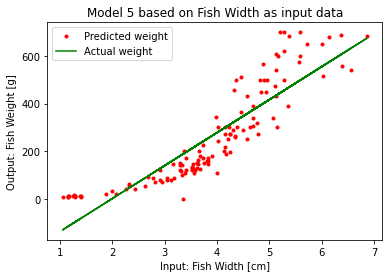

In [15]:
# Computing predicted_weight5 using model 5
predicted_weight5 = function_2(train_Width, intercept_5, slope_5)

# plot the data and the fitted model.
plt.plot(train_Width, train_Weight,'r.', label='Predicted weight')
plt.plot(train_Width,  predicted_weight5,'g-', label='Actual weight')

plt.title('Model 5 based on Fish Width as input data')
plt.xlabel('Input: Fish Width [cm]')
plt.ylabel('Output: Fish Weight [g]')
plt.legend()
plt.savefig('../results/Model_5.png',dpi=600)
plt.show()

## Step 7: Use function_3 to calculate model RSS

In [16]:
# Computing RSS for train data 
train_rss = np.zeros(5)
train_rss [0] = function_3(train_Length1, train_Weight, intercept_1, slope_1)
train_rss [1] = function_3(train_Length2, train_Weight, intercept_2, slope_2)
train_rss [2] = function_3(train_Length3, train_Weight, intercept_3, slope_3)
train_rss [3] = function_3(train_Height, train_Weight, intercept_4, slope_4)
train_rss [4] = function_3(train_Width, train_Weight, intercept_5, slope_5)

In [17]:
# Computing RSS for test data
test_rss = np.zeros(5)
test_rss [0] = function_3(test_Length1, test_Weight, intercept_1, slope_1)
test_rss [1] = function_3(test_Length2, test_Weight, intercept_2, slope_2)
test_rss [2] = function_3(test_Length3, test_Weight, intercept_3, slope_3)
test_rss [3] = function_3(test_Height, test_Weight, intercept_4, slope_4)
test_rss [4] = function_3(test_Width, test_Weight, intercept_5, slope_5)

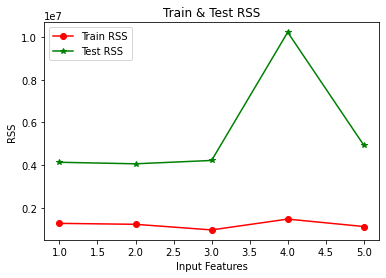

In [18]:
# plot Train & Test RSS
plt.plot(np.arange(1,6), train_rss,'r-o', label='Train RSS')
plt.plot(np.arange(1,6),  test_rss,'g-*', label='Test RSS')

plt.title('Train & Test RSS')
plt.xlabel('Input Features')
plt.ylabel('RSS')
plt.legend()
plt.savefig('../results/RSS.png',dpi=600)
plt.show()

In [19]:
# printing results
print(f'Test_RSS for models 1 to 5: \n {test_rss/ 10**3} x 10^3')

# finding minimum RSS
k_min = np.argmin(test_rss)
print(f'\n The minimum RSS = {test_rss[k_min]/ 10**3} x 10^3 belonging to model {k_min+1} for {list(df.columns)[k_min+2]} as input data')


Test_RSS for models 1 to 5: 
 [ 4136.29117418  4064.49698922  4221.30932894 10228.3249659
  4937.84041478] x 10^3

 The minimum RSS = 4064.496989220013 x 10^3 belonging to model 2 for Length2 as input data
